# Activity 3
## Jett R
## 4/21/24

### Task 1

In [3]:
# !pip install census

In [2]:
from census import Census
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

c = Census("07f8362afd0c629e4252f76c44dcded38fa2dfbb")
data = c.acs5.state(('B25034_011E'), '41')

In [3]:
variable_list = ['B25034_002E','B25034_003E', 'B25034_004E', 'B25034_005E','B25034_006E', 
                 'B25034_007E','B25034_008E', 'B25034_009E', 'B25034_010E', 'B25034_011E']

data = c.acs5.state((variable_list), '41')

In [14]:
# Make DataFrame
df = pd.DataFrame(data)

# Drop last column
df = df.drop(['state'], axis=1)

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B25034_002E  1 non-null      float64
 1   B25034_003E  1 non-null      float64
 2   B25034_004E  1 non-null      float64
 3   B25034_005E  1 non-null      float64
 4   B25034_006E  1 non-null      float64
 5   B25034_007E  1 non-null      float64
 6   B25034_008E  1 non-null      float64
 7   B25034_009E  1 non-null      float64
 8   B25034_010E  1 non-null      float64
 9   B25034_011E  1 non-null      float64
dtypes: float64(10)
memory usage: 212.0 bytes


,B25034_002E,B25034_003E,B25034_004E,B25034_005E,B25034_006E,B25034_007E,B25034_008E,B25034_009E,B25034_010E,B25034_011E
0,3375.0,132994.0,251534.0,293362.0,194274.0,330075.0,162452.0,140051.0,92807.0,197940.0


Text(0, 0.5, 'Value of Variable')

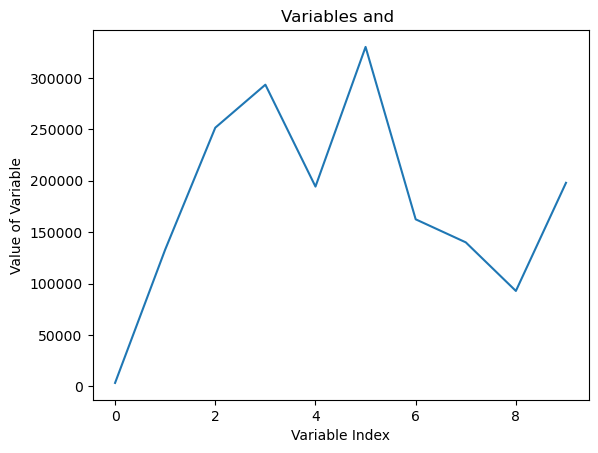

In [18]:
plt.plot(df.values[0])
plt.title('Variables and ')
plt.xlabel('Variable Index')
plt.ylabel('Value of Variable')

### Task 2

In [20]:
variables = ['B06009_006E','B26101_190E','B08006_041E'] 
LaneData = c.acs5.state_county_tract((variables), '41', '039', Census.ALL)
# B06009_006E is Estimated Total of Graduate and Professional Degree
# B26101_190E is total student housing
# B08006_041E is public transport taken by women

In [21]:
student_info = pd.DataFrame(LaneData)
#student_info = student_info.drop(['state','county'], axis=1)

In [22]:
student_info.head()

,B06009_006E,B26101_190E,B08006_041E,state,county,tract
0,500.0,None,4.0,41,039,000100
1,337.0,None,0.0,41,039,000200
2,312.0,None,0.0,41,039,000300
3,217.0,None,0.0,41,039,000402
4,290.0,None,0.0,41,039,000403


### Task 3

In [23]:
shapefile_path = 'C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Activities/3_CensusData/tl_2021_41_tract/tl_2021_41_tract.shp'
gdf = gpd.read_file(shapefile_path)


new_df = pd.merge(gdf, student_info, left_on=['TRACTCE', 'COUNTYFP'], right_on=['tract', 'county'], how='inner')

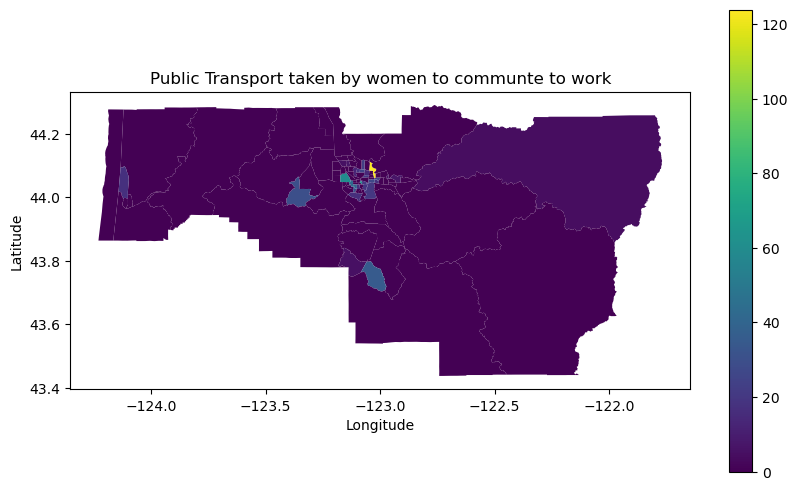

In [24]:
# Plot the choropleth map
new_df.plot(column='B08006_041E', cmap='viridis', legend=True, figsize=(10, 6))
plt.title('Public Transport taken by women to communte to work')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()